# Chap10 - Introduction to Artificial Neural Networks

## SetUp

In [1]:
import os
import numpy as np
import tensorflow as tf

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

## 10.1 생물학적 뉴런에서 인공 뉴런까지

**인공 신경망**(ANN, Aritificial Neural Networks)은 1943년 신경생리학자 Warren McCulloch과 수학자 Walter Pitts가 ['A Logical Calculus of Ideas Immanent In Nervous Activity'](https://pdfs.semanticscholar.org/5272/8a99829792c3272043842455f3a110e841b1.pdf) 처은 소개했으며, 명제 논리(propositional logic)를 사용해 동물 뇌의 생물학적 뉴런이 복잡한 계산을 위해 어떻게 상호작용하는지에 대해 간단한 계산 모델을 제시했다. 

1960년대까지는 이렇게 등장한 인공 신경망을 통해 사람들은 지능을 가진 기계와 대화를 나눌 수 있을 것이라고 생각했다. 하지만 아래 그림(출처: [beamandrew's blog](https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html))처럼 사람들의 기대와는 달리 인공 신경망으로 `XOR`문제를 해결할 수 없게 되었고, 1990년 대에는 SVM과 성능이 좋은 다른 머신러닝 알고리즘들이 나오게 되면서 인공 신경망은 암흑기로 접어 들게 되었다.

 

![](./images/history.jpg)



2000년 대에 들어서면서 인공 신경망은 2012년 ILSVRC2012 대회에서 인공 신경망을 깊게 쌓은 딥러닝 모델인 AlexNet이 압도적인 성적으로 우승하면서 다시금 주목받게 되었다. 이렇게 인공 신경망(딥러닝)이 다시 주목받게 된 계기는 다음과 같은 것들이 있다.

- 빅 데이터 시대인 요즘 신경망을 학습시키기 위한 데이터가 엄청나게 많아 졌다.
- 신경망은 다른 머신러닝 알고리즘보다 규모가 크고 복잡한 문제에서 성능이 좋다.
- 1990년대 이후 크게 발전된 컴퓨터 하드웨어 성능과 Matrix연산에 고성능인 GPU로 인해 상대적으로 짧은 시간 안에 대규모의 신경망을 학습시킬 수 있게 되었다.

### 10.1.1 생물학적 뉴런

인공 뉴런에 대해 살펴보기 전에 생물학적 뉴런을 먼저 살펴보도록 하자. 아래의 그림(출처: [wikipedia](https://en.wikipedia.org/wiki/Neuron))은 사람의 뇌에서 볼 수 있는 세포로써 핵(nucleus)을 포함하는 **세포체**(cell body)와 구성 요소로 이루어져 있다.

- **Dendrite** : 수상돌기, 다른 뉴런으로부터 신호를 수용하는 부분
- **Axon** : 축삭돌기, 신호를 내보내는 부분
- **Synaptic terminals** : 시냅스(synapse) 뉴런의 접합부, 다른 뉴런으로 부터 짧은 전기 자극 **신호**(signal)를 받음

![](./images/neuron.png)

### 10.1.2 뉴런을 사용한 논리 연산

처음 인공 신경망을 제안한  Warren McCulloch과 Walter Pitts의 인공 뉴런 모델은 아래의 그림(출처: 핸즈온-머신러닝)과 같다. 이 모델은 하나 이상의 이진(`on/off`) 입력과 하나의 출력을 가진다. 

![](./images/mcp.png)



- ①은 항등함수를 의미하며, 뉴런 `A`가 활성화 되면 뉴런 `C` 또한 활성화된다.
- ②는 논리곱 연산을 의미하며, 뉴런 `A`와 `B`가 모두 활성화될 때만 뉴런 `C`가 활성화된다. 
- ③은 논리합 연산을 의미하며, 뉴런 `A`와 `B` 둘 중 하나라도 활성화되면 `C`가 활성화된다.
- ④는 어떤 입력이 뉴런의 활성화를 억제할 수 있다고 가정하면, 위의 그림에서 처럼 뉴런 `A`가 활성화 되고 `B`가 비활성화될 때 뉴런 `C`가 활성화된다.

### 10.1.3 퍼셉트론

**퍼셉트론**(Perceptron)은 Frank Rosenblatt가 1975년에 제안한 인공 신경망 구조 중 하나이며, 이 퍼셉트론이 바로 신경망(딥러닝)의 기원이 되는 알고리즘이라고 할 수 있다. 퍼셉트론에 대한 자세한 내용은 [여기](http://excelsior-cjh.tistory.com/169?category=940400)서 확인할 수 있다.

퍼셉트론은 **TLU**(Threshold Logic Unit)이라는 형태의 뉴런을 기반으로 하며, 아래의 그림과 같이 입력과 출력이 어떤 숫자고 각각의 입력에 각각 고유한 **가중치**($\mathbf{W}$, weight)가 곱해진다.
$$
z = w_1x_1 + w_2x_2 + \cdots + w_nx_n = \mathbf{W}^{T} \cdot \mathbf{X}
$$
그런 다음 계산된 합 $z$에 **계단 함수**(step function)를 적용하여 결과 $h$를 출력한다.
$$
\begin{align*}
h_w(\mathbf{X}) &= \text{step}(z) \\ &= \text{step}(\mathbf{W}^{T} \cdot \mathbf{X})
\end{align*}
$$



![](./images/perceptron02.png)



퍼셉트론에서 가장 널리 사용되는 계단 함수는 **헤비사이드 계단 함수**(Heaviside step function)이며, 단위 계단 함수(unit step function)라고도 한다. 간혹 계단 함수 대신 부호 함수(sign function)을 사용하기도 한다.
$$
\text{heaviside}(z)=\begin{cases} 0 \text{  (}z < 0)  \\ 1 \text{  (}z \ge 0) \end{cases}, \quad \text{sgn}(z)= \begin{cases} -1 \text{  (}z < 0)\\ 0 \text{ (}z = 0)\\ +1 \text{  (}z > 0)\end{cases}
$$



위의 그림에서 처럼, 하나의 TLU는 입력과 가중치의 선형결합인 $z$가 $z \ge 0$ 이면 양성 클래스, $z < 0$이면 음성 클래스를 출력하게 하는 **선형 이진 분류**(linear binary classification)에 적용할 수 있다.  이러한 TLU를 학습시킨다는 것은 분류를 잘할 수 있는 최적의 매개변수 $w_1, w_2, \dots, w_n$을 찾는다는 뜻이다.

아래의 그림은 위의 TLU를 세 개로 구성한 퍼셉트론에 편향($x_0=1$)을 추가한 것이다. 이 퍼셉트론은 샘플 세 개의 클래스(레이블)로 분류할 수 있는 **Multioutput Classifier**이다.



![](./images/multi-tlu.png)

#### 퍼셉트론 학습

Frank Rosenblatt가 제안한 퍼셉트론의 학습 알고리즘은 **헤브의 규칙**(Hebb's rule)로 부터 영감을 받았다. Donald Hebb는 1949년에 출간한 책 'The Organization of Behavior'에서 뉴런이 다른 뉴런을 활성화시킬 때 이 두 뉴런의 연결이 강해진다고 주장했다. 즉, **두 뉴런이 동일한 출력을 낼 때마다 이 둘 사이의 연결 가중치가 증가**하며 이러한 규칙을 헤브의 규칙 또는 **헤브 학습**(Hebbian Learning)이라고 한다.  퍼셉트론은 네트워크가 만드는 에러를 반영하도록 학습되며 잘못된 출력을 만드는 연결은 올바른 출력을 만들 수 있도록 가중치를 조정한다.

예를 들어 하나의 데이터 샘플이 퍼셉트론에 입력되면 각 샘플에 대해 출력(예측)이 만들어지고, 잘못된  예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 아래의 식과 같이 입력에 연결된 가중치를 강화한다.


$$
w_{i,j}^{\text{(next step)}} = w_{i,j} + \eta \left( y_j - \hat{y}_j \right) x_i
$$

- $w_{i,j}$ : $i$-번째 입력 뉴런과 $j$-번째 출력 뉴런 사이를 연결하는 가중치
- $x_i$ : 현재 학습 데이터 샘플의 $i$-번째 뉴런의 입력값
- $\hat{y}_j$ : 현재 학습 데이터 샘플의 $j$-번째 출력 뉴런의 출력값
- $y_j$ : 현재 학습 데이터 샘플의 $j$-번째 출력 뉴런의 실제값
- $\eta$ : 학습률, learning rate

 

Frank Rosenblatt는 학습 데이터가 선형적으로 구분될 수 있으면, 퍼셉트론은 정답에 수렴한다는 것을 보였는데 이를 **퍼셉트론 수렴 이론**(Perceptron convergence theorem)이라 한다. 하지만, 출력 뉴런의 decision boundary는 선형(결합)이므로 퍼셉트론은 복잡한 패턴 (e.g. 비선형)은 학습하지 못한다. 

#### Scikit-Learn의 Perceptron 클래스

Scikit-Learn은 하나의 TLU 퍼셉트론을 구현한 [`Perceptron`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) 클래스를 제공한다.  아래의 예제는 iris dataset(붓꽃 데이터셋)에서 꽃잎의 길이(`petal length`)와 너비(`petal width`)를 가지고 붓꽃 종류 중 `Setosa`인지 아닌지를 분류하는 이진 분류기를 구현한 것이다.

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [3]:
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


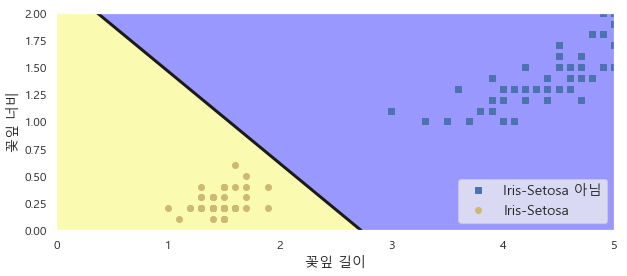

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

#### 퍼셉트론의 약점: XOR 문제

1969년 Marvin Minsky와 Seymour Papert는 '퍼셉트론'이란 논문에서 퍼셉트론의 심각한 약점이 있다는 것을 보였는데, 그 중에서도 가장 결정적인 것은 선형결합인 퍼셉트론이 배타적 논리합인 XOR 분류 문제를 해결할 수 없다는 것이었다. 

![or-vs-xor](./images/or-vs-xor.png)



이를 계기로 인공 신경망은 암흑기를 맞이하게 되었다. 하지만, 단일 퍼셉트론을 여러개 쌓아 **다층 퍼셉트론**(**MLP**, Multi-Layer Perceptron)을 통해 XOR 분류 문제를 해결할 수 있었다. 

![](./images/xor_gate05.png)



### 10.1.4 다층 퍼셉트론과 역전파

위에서 살펴 봤듯이 다층 퍼셉트론(MLP)은 아래의 그림과 같이 입력층, **은닉층**(hidden layer)이라 부르는 하나 이상의 TLU 층과 마지막으로 **출력층**(output layer)으로 구성된다. 인공 신경망의 은닉층이 2개 이상일 때, **심층 신경망**(**DNN**, Deep Neural Network)라 하고 이를 학습하여 모델을 만드는 것을 우리가 익히 들어온 **딥러닝**(Deep-Learning) 이라고 한다.

![](./images/mlp.png)



이렇게 여러층을 쌓은 MLP를 통해 XOR 문제를 해결 했지만, 층이 깊어질 수록 증가하는 가중치 매개변수의 수로 인해 다층 퍼셉트론을 학습시키기에는 오랜 시간이 걸리는 문제가 발생했다. 하지만, 1986년 **역전파(backpropogation)** 알고리즘이 등장하면서 계산량을 획기적으로 줄일 수 있게 되었다. 역전파법에 대한 자세한 내용은 [여기](http://excelsior-cjh.tistory.com/171)를 참고하면 된다.

역전파법을 간단히 설명 한다면 다음과 같다.

1. 먼저, 각 학습 데이터 샘플을 네트워크에 입력으로 넣어주고 출력층까지 각 층의 뉴런 마다 출력을 계산한다. 이를 **순전파**(forward propagation)이라고 한다. 
2. 그 다음 네트워크의 마지막 출력층에 대한 결과(예측값)와 실제값과의 차이, 즉 오차(error)를 계산하는데, 손실함수(loss function)를 이용하여 계산한다.
3. 그리고 이 오차를 역방향으로 흘러 보내면서, 각 출력 뉴런의 오차에 마지막 입력 뉴런이 얼마나 기여했는지 측정한다. 이말을 쉽게 설명하면, **각 뉴런의 입력값에 대한 손실함수의 편미분, 그래디언트(gradient)을 계산**하는 것을 말한다.
4. 3번과 같은 방법을 입력층에 도달할 때까지 계속 반복해서 역방향으로 흘러 보낸다.
5. 마지막으로, 계산한 그래디언트를 네트워크의 모든 가중치 매개변수에 반영해주는 **경사 하강법 단계**를 수행한다.



따라서, 먼저 순전파를 통해 네트워크가 예측을 출력(출력층의 출력 결과)하고, 이를 손실함수를 이용해 오차를 계산한 뒤, 역방향으로 거슬러 올라가면서 각 뉴런의 입력값에 대한 손실함수의 편미분을 계산하고(backpropagation), 이를 경사 하강법을 이용해 가중치를 조정하는 방법이 역전파 알고리즘이다.

#### 활성화 함수 (activation function)

역전파 알고리즘이 잘 동작하기 위해서 다층 퍼셉트론(MLP)의 구조에 변화를 주었는 데, 그것이 바로 활성화 함수 부분에서 계단 함수를 시그모이드 함수(로지스틱 함수)로 바꿔준 것이다. 이렇게 활성화 함수를 시그모이드 함수로 바꿔준 이유는 가중치 매개변수를 조정 해주기 위해 그래디언트, 편미분을 계산하게 되는데, 계단 함수는 0을 기준으로 기울기가 없는 직선이므로 그래디언트를 계산하는 것이 의미가 없기 때문이다(0을 기준으로 불연속이기 때문에 미분이 불가능한 이유도 있다).  활성화 함수로는 아래의 그림처럼 로지스틱 함수 외에 다양한 활성화 함수를 사용할 수 있다.

![](./images/activation02.png)



위의 그림에서 **ReLU** 또한 0에서 연속이지만 첩점(뾰족한 점)이므로 미분이 불가능하다. 하지만 0보다 큰 경우에는 미분을 적용하고 0 이하인 값에는 0을 줌으로써 해결할 수 있다. 또한, ReLU가 성능이 좋을 뿐만아니라 'cs231n' 강의에서는 실제 생물학적으로 시그모이드 보다 그럴듯한 작용을 한다고 한다.


In [22]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

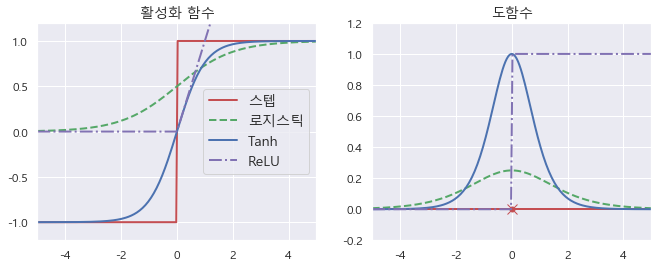

In [23]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

#### 소프트맥스(softmax) 함수

**소프트맥스 함수**(softmax function)는 출력층에서 주로 사용하는 활성화 함수이며, 식은 다음과 같다.
$$
\hat{y}_k = \frac{ \text{exp} \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)}{\sum_{j=1}^{K}{\text{exp} \left( \mathbf{W}^{T} \cdot \mathbf{x} \right)}} \quad (K=\text{# of class})
$$


소프트맥스 함수의 특징은 출력값의 총합이 1이 된다는 것이다. 따라서, 각 출력 뉴런에 대한 소프트맥스의 출력값은 각 클래스에 대응하는 추정 확률값으로 볼 수 있다.

![](./images/softmax.png)

## 10.2 텐서플로 고수준 API로 다층 퍼셉트론 학습하기

텐서플로는 사용자가 쉽게 신경망 모델링을 프로그래밍할 수 있도록 high-level의 API를 제공한다. 대표적인 high-level API로는 `tf.estimator`와 `keras`가 있는데, 이에 대한 자세한 내용은 [여기](http://excelsior-cjh.tistory.com/157?category=940399)에서 참고하면 된다.

아래의 예제는 `tf.estimator`의 `DNNClassifier` 클래스를 이용해 MNIST 숫자 데이터를 분류하는 DNN을 구현한 것이다. 

In [10]:
# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
# TF Estimator
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                     feature_columns=feature_cols)

# input function
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)

# training
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jongm\\AppData\\Local\\Temp\\tmp16z4p7tg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000023442A067F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 int

In [21]:
# Test input function
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)

# Test
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)
eval_results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-09-12-17:43:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jongm\AppData\Local\Temp\tmp16z4p7tg\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-09-12-17:43:39
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.98, average_loss = 0.10493586, global_step = 44000, loss = 13.283021
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\jongm\AppData\Local\Temp\tmp16z4p7tg\model.ckpt-44000


{'accuracy': 0.98,
 'average_loss': 0.10493586,
 'loss': 13.283021,
 'global_step': 44000}

## 10.3 텐서플로의 저수준 API로 심층 신경망 학습하기

아래의 예제는 위에서 MNIST 분류기를 `Estimator`로 구현한 것을 이번에는 텐서플로 Low-Level로 구현한 것이다.  

In [3]:
import tensorflow as tf

# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [4]:
reset_graph()

################
# layer params #
################
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

inputs = tf.placeholder(tf.float32, shape=[None, n_inputs], name="inputs")
labels = tf.placeholder(tf.int32, shape=[None], name="outputs")

In [5]:
def neuron_layer(inputs, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(inputs.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal([n_inputs, n_neurons], stddev=stddev)
        weights = tf.Variable(init, name="weights")
        bias = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(inputs, weights) + bias
        if activation:
            return activation(Z)
        else:
            return Z

In [6]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(inputs, n_hidden1, name='hidden1', 
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2',
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='logits')

In [7]:
with tf.name_scope('loss'):
    cross_entropy = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

In [9]:
################
# Hyper-params #
################
learning_rate = 0.01
n_epochs = 40
batch_size = 50

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cross_entropy)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(predictions=logits, targets=labels, k=1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [10]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [12]:
# train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={inputs: X_batch,
                                          labels: y_batch})
        
        acc_batch = accuracy.eval(feed_dict={inputs: X_batch, labels: y_batch})
        acc_valid = accuracy.eval(feed_dict={inputs: X_valid, labels: y_valid})
        print('epoch: {:03d}, bacth acc: {:.4f}, valid acc: {:.4f}'.format(epoch,
                                                                          acc_batch,
                                                                          acc_valid))

epoch: 000, bacth acc: 0.9000, valid acc: 0.9164
epoch: 001, bacth acc: 0.9000, valid acc: 0.9364
epoch: 002, bacth acc: 0.9000, valid acc: 0.9476
epoch: 003, bacth acc: 0.9600, valid acc: 0.9526
epoch: 004, bacth acc: 0.9600, valid acc: 0.9528
epoch: 005, bacth acc: 0.9600, valid acc: 0.9586
epoch: 006, bacth acc: 1.0000, valid acc: 0.9612
epoch: 007, bacth acc: 0.9400, valid acc: 0.9632
epoch: 008, bacth acc: 1.0000, valid acc: 0.9638
epoch: 009, bacth acc: 1.0000, valid acc: 0.9660
epoch: 010, bacth acc: 1.0000, valid acc: 0.9684
epoch: 011, bacth acc: 0.9800, valid acc: 0.9698
epoch: 012, bacth acc: 1.0000, valid acc: 0.9698
epoch: 013, bacth acc: 1.0000, valid acc: 0.9706
epoch: 014, bacth acc: 0.9800, valid acc: 0.9710
epoch: 015, bacth acc: 0.9800, valid acc: 0.9734
epoch: 016, bacth acc: 0.9800, valid acc: 0.9722
epoch: 017, bacth acc: 0.9800, valid acc: 0.9742
epoch: 018, bacth acc: 0.9400, valid acc: 0.9752
epoch: 019, bacth acc: 1.0000, valid acc: 0.9752
epoch: 020, bacth ac

### `neuron_layer()` 대신 `tf.layers.dense()` 사용

In [2]:
import tensorflow as tf

# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [32]:
reset_graph()

################
# layer params #
################
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

inputs = tf.placeholder(tf.float32, shape=[None, n_inputs], name="inputs")
labels = tf.placeholder(tf.int32, shape=[None], name="outputs")

In [33]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(inputs=inputs, units=n_hidden1,
                              activation=tf.nn.relu, name='hidden1',
                              kernel_initializer=tf.truncated_normal_initializer(stddev=0.1))
    hidden2 = tf.layers.dense(hidden1, n_hidden2,
                              activation=tf.nn.relu, name='hidden2',
                              kernel_initializer=tf.truncated_normal_initializer(stddev=0.1))
    logits = tf.layers.dense(hidden2, n_outputs, name='logits')

In [34]:
with tf.name_scope('loss'):
    cross_entropy = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

In [35]:
################
# Hyper-params #
################
learning_rate = 0.01
n_epochs = 40
batch_size = 50

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cross_entropy)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(predictions=logits, targets=labels, k=1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [36]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [37]:
# train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={inputs: X_batch,
                                          labels: y_batch})
        
        acc_batch = accuracy.eval(feed_dict={inputs: X_batch, labels: y_batch})
        acc_valid = accuracy.eval(feed_dict={inputs: X_valid, labels: y_valid})
        print('epoch: {:03d}, bacth acc: {:.4f}, valid acc: {:.4f}'.format(epoch,
                                                                          acc_batch,
                                                                          acc_valid))

epoch: 000, bacth acc: 0.8600, valid acc: 0.9106
epoch: 001, bacth acc: 0.9200, valid acc: 0.9256
epoch: 002, bacth acc: 0.9600, valid acc: 0.9358
epoch: 003, bacth acc: 0.9000, valid acc: 0.9418
epoch: 004, bacth acc: 0.9600, valid acc: 0.9458
epoch: 005, bacth acc: 0.9600, valid acc: 0.9484
epoch: 006, bacth acc: 1.0000, valid acc: 0.9544
epoch: 007, bacth acc: 0.9400, valid acc: 0.9582
epoch: 008, bacth acc: 0.9600, valid acc: 0.9592
epoch: 009, bacth acc: 0.9600, valid acc: 0.9624
epoch: 010, bacth acc: 0.9400, valid acc: 0.9660
epoch: 011, bacth acc: 0.9800, valid acc: 0.9640
epoch: 012, bacth acc: 0.9800, valid acc: 0.9632
epoch: 013, bacth acc: 0.9800, valid acc: 0.9662
epoch: 014, bacth acc: 1.0000, valid acc: 0.9668
epoch: 015, bacth acc: 0.9400, valid acc: 0.9678
epoch: 016, bacth acc: 0.9800, valid acc: 0.9706
epoch: 017, bacth acc: 1.0000, valid acc: 0.9682
epoch: 018, bacth acc: 0.9800, valid acc: 0.9706
epoch: 019, bacth acc: 0.9800, valid acc: 0.9706
epoch: 020, bacth ac

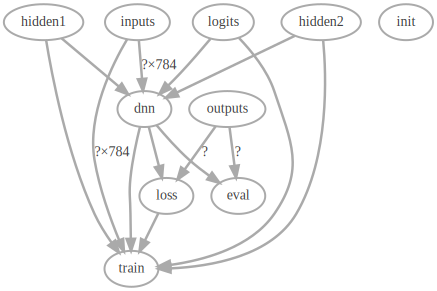

In [39]:
import graphviz
import tfgraphviz as tfg

tf_graph = tfg.board(tf.get_default_graph())
tf_graph

## 10.4 신경망 하이퍼파라미터 튜닝하기

### 10.4.1 은닉층의 수

1989년 George Cybenko는 뉴런 수만 무한하다면 은닉층 하나로 어떠한 함수도 근사할 수 있다는 것을 밝혔는데, 이를 **시벤코 정리**(Cybenko's theorem)이라고 한다. 실제로도 많은 문제들이 하나의 은닉층에 뉴런 수만 충분하다면 모델링이 가능하다. 하지만, 심층 신경망(DNN)이 얕은 신경망보다 **파라미터 효율성**이 훨씬 좋으며 복잡한 함수를 모델링하는 데에 있어 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용하기 때문에 학습 시간이 더 빠르다.

### 10.4.2 은닉층의 뉴런 수

위의 MNIST 분류기 예제 코드에서는 은닉층(hidden layer)의 뉴런수를 첫 번째 은닉층(`hidden1`)은 300개, 두 번째 은닉층(`hidden2`)은 100개로 구성하였다. 이처럼 은닉층의 뉴런 수는 일반적으로 각 층의 뉴런을 점점 줄여가는 방법으로 모델링한다. 그 이유는 저수준의 많은 특성(ex. 눈, 코, 입)이 고수준의 적은 특성(ex.얼굴 전체) 으로 합쳐질 수 있기 때문이다.

하지만, 요즘에는 모든 은닉층에 동일한 뉴런 수를 사용하며 모델이 오버피팅되기 전까지 점진적으로 뉴런 수를 늘린다. 일반적으로 층의 뉴런 수를 늘리는 것보다 층(layer) 개수를 늘리는 것이 성능이 더 좋아진다.

이처럼 최적의 은닉층의 수와 뉴런 수를 찾기란 매우 어려운 일이다. 따라서 실제 필요한 개수 보다 더 많은 층과 뉴런으로 모델링한 후에 오버피팅 되지않도록 조정해나가는 방식을 사용하는 데 이를 '스트레치 팬츠'(stratch pants) 방식이라고 한다(교재에서는 그 이유를 자신에게 알맞는 바지 사이즈를 찾는 데 시간을 낭비하는 대신, 큰 스트레치 팬츠를 사고 알맞게 줄이는게 더 낫기 때문). 